## Bayesian inference


<img src="https://miro.medium.com/max/700/1*eWB1B9MCjG7ZNxXumpsblw.png" alt="inference" style="width: 300px;"/>

**Problem**: Imagine that you flip a coin with 0 on one and 1 on the other side a hundred times and write down the results. You end up with

    1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0

These are 57 ones and 43 zeroes. We want to answer the following question:

    What is the probability θ of receiving 1?
    
    

## Likelihood

Bernoulli distributed


<img src="https://miro.medium.com/max/700/1*SjpXJWV8iWbTHmKajYW55A.png" alt="Likelihood" style="width: 300px;"/>

## Prior

Beta(2, 2)

<img src="https://miro.medium.com/max/700/1*w5MW91IXnRH8_KCFC9lW2g.png" alt="Prior" style="width: 200px;"/>

## Setup

In [17]:
!pip install pymc3
!pip install arviz

import warnings

import pymc3 as pm
import arviz as az

warnings.simplefilter(action="ignore", category=FutureWarning)

Looking in links: file:///home/bcebere/.cache/pip/wheelhouse
Looking in links: file:///home/bcebere/.cache/pip/wheelhouse


In [18]:
tosses = [
    1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
    0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
    0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
    0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
    1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
    1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
    0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
    1, 1, 1, 0, 0, 0, 1, 0, 1, 0
]

In [19]:
with pm.Model() as model:
    # define the prior
    theta = pm.Beta('theta', 2, 2)
    
    # define the likelihood
    data = pm.Bernoulli('data', theta, observed=tosses)
    
    # get the samples
    trace = pm.sample()

/home/bcebere/anaconda3/envs/vds/lib/python3.8/site-packages/aesara/graph/fg.py:500: UserWarning: Variable Elemwise{switch,no_inplace}.0 cannot be replaced; it isn't in the FunctionGraph
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/bcebere/anaconda3/envs/vds/lib/python3.8/site-packages/aesara/graph/fg.py:500: UserWarning: Variable Elemwise{Switch}.0 cannot be replaced; it isn't in the FunctionGraph
  warnings.warn(
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.


/home/bcebere/anaconda3/envs/vds/lib/python3.8/site-packages/aesara/graph/fg.py:500: UserWarning: Variable Elemwise{switch,no_inplace}.0 cannot be replaced; it isn't in the FunctionGraph
  warnings.warn(
/home/bcebere/anaconda3/envs/vds/lib/python3.8/site-packages/aesara/graph/fg.py:500: UserWarning: Variable Elemwise{switch,no_inplace}.0 cannot be replaced; it isn't in the FunctionGraph
  warnings.warn(


<AxesSubplot:title={'center':'theta'}>

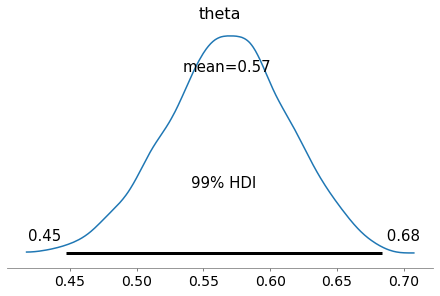

In [20]:
az.summary(trace)
az.plot_posterior(trace, hdi_prob=0.99)

### TLDR
If we are expected to give a single number, we would go for 57%. Otherwise, we are able to say that it’s somewhere between 44% and 68% with a probability of 99%.

### References

1. https://towardsdatascience.com/conducting-bayesian-inference-in-python-using-pymc3-d407f8d934a5